<a href="https://colab.research.google.com/github/WinetraubLab/OCT2Hist-ModelInference/blob/highres_vhist/run_oct2hist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
Use this notebook to convert an OCT image to virtual histology.

To get started,
[open this notebook in colab](https://colab.research.google.com/github/WinetraubLab/OCT2Hist-ModelInference/blob/main/run_oct2hist.ipynb) and run.

View this colab on [Github](https://github.com/WinetraubLab/OCT2Hist-ModelInference/blob/main/run_oct2hist.ipynb).


In [1]:
# @title Notebook Inputs { display-mode: "form" }
# @markdown Input Image Path.
# Path to the OCT image
# @markdown Set oct_input_image_path="" (empty) to load a file from local file system.
oct_input_image_path = "/content/drive/Shareddrives/Yolab - Current Projects/_Datasets/zero_shot_paper_10xOCT_skin_test/LH-22-Slide04_Section01_yp0_A.jpg" # @param {type:"string"}

# If empty string, choose file to upload
if not oct_input_image_path:
  from google.colab import files
  import os
  uploaded = files.upload()
  oct_input_image_path = list(uploaded.keys())[0]
  oct_input_image_path = os.path.join(os.getcwd(), oct_input_image_path)


## Set Up Environment

In [2]:
if not 'setup_env_oct2Hist_usemodel' in globals():
  setup_env_oct2Hist_usemodel = True
  !git clone --recurse-submodules https://github.com/WinetraubLab/OCT2Hist-ModelInference
  %cd OCT2Hist-ModelInference
  # Testing the PR branch
  !git checkout highres_vhist


import cv2
import matplotlib.pyplot as plt
import numpy as np
import oct2hist
from utils.show_images import *
from google.colab import drive
from utils.crop import crop
drive.mount('/content/drive/')

Cloning into 'OCT2Hist-ModelInference'...
remote: Enumerating objects: 852, done.
remote: Counting objects: 100% (132/132), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 852 (delta 114), reused 110 (delta 102), pack-reused 720 (from 2)
Receiving objects: 100% (852/852), 26.41 MiB | 36.20 MiB/s, done.
Resolving deltas: 100% (459/459), done.
Submodule 'pytorch-CycleGAN-and-pix2pix' (https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) registered for path 'pytorch-CycleGAN-and-pix2pix'
Cloning into '/content/OCT2Hist-ModelInference/pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2619, done.        
remote: Total 2619 (delta 0), reused 0 (delta 0), pack-reused 2619 (from 1)        
Receiving objects: 100% (2619/2619), 8.23 MiB | 17.07 MiB/s, done.
Resolving deltas: 100% (1654/1654), done.
Submodule path 'pytorch-CycleGAN-and-pix2pix': checked out '9f8f61e5a375c2e01c5187d093ce9c2409f409b0'
/content/OCT2Hist-ModelInference
Branch 'highres_vhist' set u

In [3]:
# Set up the network environment
oct2hist.setup_network()

Mounting drive: if it takes >30 sec, re-run.
Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Drive mounted.


## Run
In this step we load the OCT image, then crops it to the right size



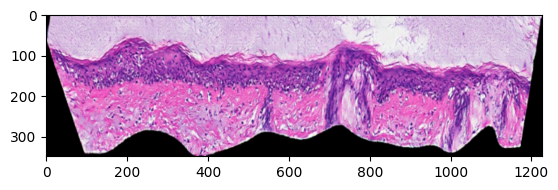

In [5]:
# Load OCT image
oct_image = cv2.imread(oct_input_image_path)
if oct_image is None:
  raise FileNotFoundError(f"The file '{oct_input_image_path}' was not found.")

# Run Inference
virtual_histology_image, masked_image , o2h_input = oct2hist.run_network(
    oct_image,
    apply_masking = False,
    # min_signal_threshold = 0.15, # Un comment this part to skip the auto threshold discovery
    )

# Show the virtual histology image result
showImg(virtual_histology_image)

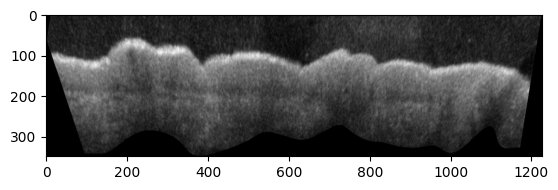

In [6]:
#@title Masked Image
showImg(masked_image)

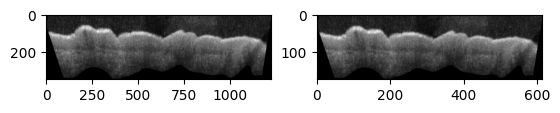

In [7]:
#@title Pre Processing Results (before - left, after preprocessing - right)
showTwoImgs(oct_image, o2h_input)

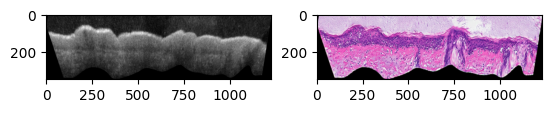

In [8]:
#@title Final Results
showTwoImgs(oct_image, virtual_histology_image)